# Deteccion de Anomalias

## ¿Qué es la detección de anomalías?

La detección de anomalías es el proceso de identificar observaciones, eventos o patrones que no se ajustan al comportamiento esperado de los datos. En machine learning se usa para detectar fraudes, fallas en equipos, outliers en sensores, intrusiones en redes y datos erróneos.

## Tipos de anomalías

- Punto (point): una sola instancia atípica respecto al resto.  
- Contextual (o condicional): una instancia es anómala en un contexto (por ejemplo, temperatura alta en invierno).  
- Colectiva: un conjunto de instancias juntas forman una anomalía aunque individualmente parezcan normales.

## Enfoques de modelado

- Supervised: requiere etiquetas para normales/anómalos; útil si hay muchos ejemplos etiquetados.  
- Semi-supervised: se entrena solo con datos normales y detecta desviaciones (p. ej. One-Class SVM, autoencoders).  
- Unsupervised: asume pocos o ningún label; busca estructuras inusuales en los datos (p. ej. clustering, LOF, Isolation Forest).

## Algoritmos comunes

- Estadísticos: z-score, pruebas de distribución, modelos basados en probabilidades.  
- Distancia / vecinos: k-NN, Local Outlier Factor (LOF).  
- Basados en densidad: DBSCAN, LOF.  
- Basados en aislamiento: Isolation Forest.  
- Modelos de reconstrucción: PCA, autoencoders, variational autoencoders.  
- Margen único: One-Class SVM.  
- Series temporales: ARIMA, Prophet, modelos basados en LSTM/Seq2Seq para detectar anomalías temporales.
- Ensambles: combinar varios detectores para mayor robustez.

## Evaluación

- Métricas: precisión, recall, F1, ROC-AUC, PR-AUC; en problemas muy desbalanceados usar curvas PR.  
- Validación: usar cross-validation cuando sea posible, simular anomalías sintéticas si faltan etiquetas reales.  
- Thresholding: elegir umbral según trade-off entre falsos positivos y falsos negativos y coste asociado.

## Desafíos y consideraciones

- Desbalance fuerte entre normales y anomalías.  
- Falta de etiquetas y definición ambigua de “anómalo”.  
- Concept drift: los comportamientos normales cambian con el tiempo.  
- Interpretabilidad: explicar por qué algo se marca como anomalía.  
- Escalabilidad y latencia en entornos en tiempo real.

## Buenas prácticas

- Realizar limpieza y normalización cuidadosa de características.  
- Ingeniería de características y extracción de contexto temporal o espacial.  
- Probar múltiples enfoques: estadístico, de densidad y de reconstrucción.  
- Usar validación con anomalías sintéticas y análisis de sensibilidad del umbral.  
- Monitorizar modelos en producción para detectar degradación y concept drift.  
- Documentar casos de falsos positivos y negativos para iterar el modelo.

## Pipeline típico

1. Recolección y etiquetado (si existe).  
2. Preprocesamiento: limpieza, normalización, tratamiento de missing.  
3. Ingeniería de features (lags, rolling stats, agregaciones).  
4. Selección/entrenamiento del modelo (o conjunto de modelos).  
5. Selección de umbral y evaluación.  
6. Despliegue con monitorización y retroalimentación para actualización.

Cuando se aplica correctamente, la detección de anomalías permite mitigar riesgos tempranamente y mejorar la robustez de sistemas que dependen de datos confiables.

Caracteristicas que difieren del conjunto de datos.

* La detección de intrusiones se cataloga principalmente en dos categorías
    * Basado en reglas y heurísticas: Genera un numero reducido de falsos positivos. Detecta ataques conocidos. NO funciona correctamente para la detección de nuevos ataques
    * Basado en anomalías: Perfila el comportamiento normal del sistema. Es capaz de detectar ataques nuevos. Puede generar un numero mayor de falsos positivos.

**Basado en reglas y en heurísticas**

* Los sistemas de detección de intrusiones (IDS) son aplicaciones que monitorizan una red de ordenadores o un host en busca de actividad maliciosa o el incumplimiento de una serie de reglas establecidas en una política previamente definida. Su funcionamiento, de manera muy simplificada, se basa en el uso de heurísticas, umbrales y propiedades estadísticas muy sencillas
* Ejemplo de fuerza bruta: Cada vez que un usuario realiza una petición de autenticación al servidor, el sistema de detección de intrusiones la registra. En el momento en el que el número de peticiones supera el límite establecido, por ejemplo, quince peticiones, el sistema reporta la actividad del usuario como una anomalía
* Estos sistemas presentan algunas ventajas:
    * Es sencillo de implementar
    * Consume un número reducido de recursos
    * Es capaz de detectar y mitigar numerosos ataques actuales
* Sin embargo, tiene algunos inconvenientes:
    * ¿Cómo se establece el número máximo de peticiones?
    * ¿Cada cuánto tiempo se regula eI número máximo de peticiones?
    * ¿Qué sucede si el atacante utiliza varias cuentas de usuario para realizar la fuerza bruta?

* Una anomalía es un evento que se desvía del comportamiento normal 0 esperado y es sospechoso, en este caso, desde una perspectiva de seguridad.
* La detección de anomalías es la identificación eventos u observaciones que levantan sospechas al diferir significativamente de la mayoría de los datos
* La detección de anomalías fue propuesta para sistemas de detección de intrusiones (IDS) por
Dorothy Denning en 1986
* Las anomalías pueden producirse debido a dos factores principales:
    * Relacionadas con el rendimiento
    * Relacionadas con la seguridad

* Aprendizaje semi-supervisado: pueden usar ejemplos etiquetados de un número limitado de categorías. Por ejemplo, si hay dos categorías posibles {0,1 } podemos tener ejemplos etiquetados con la clase () únicamente.

El aprendizaje semi-supervisado combina una pequeña cantidad de datos etiquetados con una gran cantidad de datos no etiquetados para mejorar el rendimiento del modelo. Es útil cuando etiquetar es costoso o las etiquetas de anomalía son escasas.

Principales enfoques:
- Autoetiquetado (self-training / pseudo-labeling): el modelo entrena con las pocas etiquetas, predice etiquetas para los no etiquetados y reentrena con las predicciones de alta confianza.
- Co-training: dos (o más) modelos con vistas diferentes del mismo dato se enseñan mutuamente usando predicciones confiables.
- Basados en grafos y propagación de etiquetas: construyen una estructura de similitud entre instancias y propagan etiquetas a nodos cercanos.
- Regularización por consistencia y métodos modernos (e.g., FixMatch, MixMatch): usan augmentaciones y pérdida que fuerza consistencia entre predicciones en entradas perturbadas.
- Modelos semi-supervisados específicos: Semi-supervised SVM, label propagation, técnicas basadas en autoencoders.

Ventajas:
- Mejora la generalización respecto a entrenar solo con las pocas etiquetas.
- Reduce el coste de etiquetado aprovechando datos no anotados.

Desventajas y riesgos:
- Sesgo por autoetiquetado: errores tempranos se amplifican.
- Requiere mecanismos (umbral, calibración, validación) para evitar usar etiquetas falsas.
- Menor beneficio si los no etiquetados no son representativos.

Buenas prácticas:
- Usar umbrales de confianza y validación con un conjunto etiquetado de control.
- Aplicar augmentaciones y regularizaciones para evitar sobreajuste.
- Inspeccionar y balancear clases cuando las anomalías son raras.
- Combinar con técnicas no supervisadas para robustez en detección de anomalías (e.g., clustering + pseudo-labeling).

Aplicación en detección de anomalías/IDS:
- Entrenar con ejemplos normales etiquetados y usar no etiquetados para aprender la estructura de lo normal; detectar desviaciones como anomalías.
- Generar pseudo-etiquetas solo para instancias claramente normales o anómalas (alta confianza) y reevaluar periódicamente para mitigar drift.

# Distribucion Gaussiana

La distribución gaussiana (o normal) es una distribución continua en forma de campana definida por la densidad

$f(x)=\dfrac{1}{\sigma\sqrt{2\pi}}\exp\!\left(-\dfrac{(x-\mu)^2}{2\sigma^2}\right)$

donde μ es la media y σ² la varianza. Es simétrica alrededor de μ (media = mediana = moda). Propiedades prácticas: la regla empírica 68–95–99.7% para ±1σ, ±2σ y ±3σ, y aparece frecuentemente por el Teorema del Límite Central. Se usa para modelar errores, ruido y muchas variables naturales.

- x: la variable aleatoria (valor que puede tomar la distribución). En el PDF $f(x)$ se evalúa para distintos valores de $x$.
- μ (mu): la media o esperanza. Es el centro de la campana; la distribución es simétrica alrededor de μ (media = mediana = moda).
- σ (sigma): la desviación estándar. Mide la dispersión típica de los valores alrededor de μ. Un σ pequeño indica que los datos están muy concentrados cerca de μ; un σ grande indica mayor dispersión.
- σ²: la varianza, que es el cuadrado de la desviación estándar (σ² = Var(X)). Representa la dispersión en unidades al cuadrado.
- Parámetros (μ, σ) juntos determinan la forma: μ desplaza la campana a lo largo del eje x; σ controla su anchura y altura (a mayor σ, la campana es más ancha y más baja; a menor σ, más estrecha y más alta).

Ejemplo intuitivo: si μ = 0 y σ = 1, la mayoría de los valores (≈68%) caerán entre −1 y 1; si σ = 2, ese mismo porcentaje caerá entre −2 y 2.

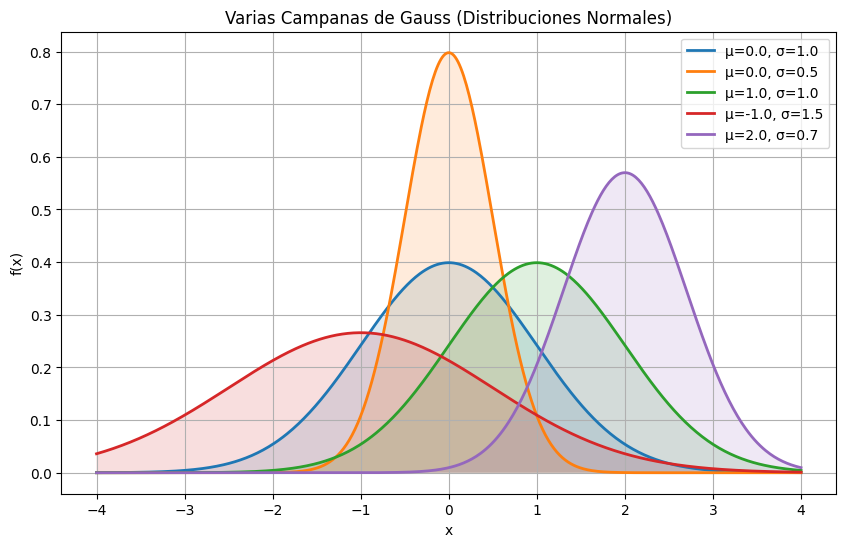

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_pdf(x, mu=0.0, sigma=1.0):
    """Densidad de la distribución normal (Gaussiana)."""
    return 1.0 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Lista de parámetros para diferentes campanas
params = [
    (0.0, 1.0),
    (0.0, 0.5),
    (1.0, 1.0),
    (-1.0, 1.5),
    (2.0, 0.7)
]

plt.figure(figsize=(10, 6))
for mu_i, sigma_i in params:
    y_i = gaussian_pdf(x, mu_i, sigma_i)
    plt.plot(x, y_i, lw=2, label=f'μ={mu_i}, σ={sigma_i}')
    plt.fill_between(x, y_i, alpha=0.15)

plt.title('Varias Campanas de Gauss (Distribuciones Normales)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

Las ecuaciones para calcular la media ($\mu$) y la varianza ($\sigma^2$) de una variable aleatoria $X$ a partir de una muestra de $n$ valores $x_1, x_2, ..., x_n$ son:

**Media (μ):**
$
\mu = \frac{1}{n} \sum_{i=1}^{n} x_i
$

**Varianza (σ²):**
$
\sigma^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \mu)^2
$

**Covarianza entre dos variables $X$ y $Y$:**
$
\mathrm{Cov}(X, Y) = \frac{1}{n} \sum_{i=1}^{n} (x_i - \mu_X)(y_i - \mu_Y)
$

Donde $\mu_X$ y $\mu_Y$ son las medias de $X$ y $Y$ respectivamente.

La función de densidad gaussiana (o normal) es fundamental en machine learning para modelar la probabilidad de que un dato pertenezca a una distribución "normal" (esperada). Se usa en varios contextos:

- **Modelado de datos**: Muchos algoritmos asumen que los datos siguen una distribución normal, lo que permite aplicar técnicas estadísticas como el z-score para detectar outliers/anomalías.
- **Clasificación probabilística**: En modelos como Naive Bayes, la función gaussiana se usa para calcular la probabilidad de que una característica pertenezca a una clase.
- **Reducción de dimensionalidad**: Métodos como PCA asumen que los datos tienen una distribución normal para encontrar componentes principales.
- **Detección de anomalías**: Si un dato tiene una probabilidad muy baja bajo la función gaussiana (lejos de la media), puede considerarse anómalo.

En resumen, la función gaussiana permite cuantificar qué tan "normal" es un dato respecto a la media y la dispersión del conjunto, facilitando la clasificación, detección de anomalías y modelado probabilístico en machine learning.

## Distribucion gausiana threshol

* Se divide el conjunto de datos en subconjuntos de entrenamiento, validación, pruebas
* Se entrena el algoritmo (obtención de los parámetros media y varianza) con el subconjunto de entrenamiento
* Se realizan predicciones con el subconjunto de validación probando diferentes threshold (hiperparámetro) y se evalúa el resultado con diferentes métricas
* Se selecciona el threshold que produce mejores resultados y se evalúa de nuevo con el subconjunto de pruebas para asegurar que no se produce oveffitting

## Distribucion Gaussiana Multivariable

La **distribución gaussiana multivariable** (o normal multivariante) es una extensión de la distribución normal a más de una variable aleatoria. Modela conjuntos de datos donde cada muestra es un vector y las variables pueden estar correlacionadas.

La función de densidad para un vector $\mathbf{x} \in \mathbb{R}^d$ es:

$$
f(\mathbf{x}) = \frac{1}{(2\pi)^{d/2} |\Sigma|^{1/2}} \exp\left(-\frac{1}{2} (\mathbf{x} - \boldsymbol{\mu})^\top \Sigma^{-1} (\mathbf{x} - \boldsymbol{\mu})\right)
$$

- $\boldsymbol{\mu}$: vector de medias (centro de la distribución).
- $\Sigma$: matriz de covarianza ($d \times d$), describe la dispersión y correlación entre variables.
- $|\Sigma|$: determinante de la matriz de covarianza.

**Propiedades:**
- Si las variables son independientes, $\Sigma$ es diagonal y la distribución se reduce al producto de gaussianas univariantes.
- Las elipses de nivel de la densidad muestran la correlación: si hay correlación, las elipses están inclinadas.
- Se usa para modelar datos multidimensionales en machine learning, clustering (p.ej. GMM), reducción de dimensionalidad y detección de anomalías.

**Ejemplo de aplicación:**  
En detección de anomalías, se estima $\boldsymbol{\mu}$ y $\Sigma$ con datos normales. Un nuevo punto $\mathbf{x}$ se evalúa con la densidad: si $f(\mathbf{x})$ es muy bajo, se considera anómalo.

La normal multivariante permite modelar relaciones complejas entre variables y es fundamental en estadística multivariada y machine learning.

![Multivariable](Images/Multivariable.png)

# Isolation Forest

Isolation Forest es un algoritmo de machine learning para detección de anomalías basado en el principio de aislamiento. A diferencia de los métodos tradicionales que perfilan la normalidad, Isolation Forest identifica anomalías separando instancias mediante particiones aleatorias.

**¿Cómo funciona?**
- Construye múltiples árboles de aislamiento (isolation trees) dividiendo aleatoriamente los datos en cada nodo.
- Las anomalías suelen requerir menos divisiones para aislarse porque son raras y diferentes del resto.
- La puntuación de anomalía se basa en la longitud promedio del camino necesario para aislar cada punto: caminos cortos indican anomalías.

**Ventajas:**
- Escalable a grandes volúmenes de datos.
- No requiere suponer una distribución previa de los datos.
- Funciona bien en alta dimensión y con datos mixtos.

**Aplicaciones:**
- Detección de fraudes, fallos en sensores, intrusiones en sistemas y limpieza de outliers.

**Ejemplo de uso en Python:**
```python
from sklearn.ensemble import IsolationForest

# Entrenamiento
clf = IsolationForest(contamination=0.05)
clf.fit(X_train)

# Predicción
y_pred = clf.predict(X_test)  # -1: anómalo, 1: normal
```

Isolation Forest es especialmente útil cuando las anomalías son escasas y no están etiquetadas, permitiendo una detección eficiente y robusta.

* Algoritmo de detección de anomalías basado en aprendizaje no supervisado
* No perfila los datos normales
* NO se basa en medidas de distancia 0 densidad para identificar las anomalías
* Se corresponde con un ensemble de árboles aleatorios binarios
* Funciona adecuadamente para conjuntos de datos grandes, con muchas dimensiones y con un número elevado de atributos irrelevantes

* Isolation Forest se basa en las siguientes premisas:
    - EI subconjunto de datos anómalos es minoritario en relación con el subconjunto de datos normales
    - Los datos anómalos poseen características que los hacen muy diferentes con relación a los datos normales.

![isolation forest](Images/fun_if.png)

*Funcion del algoritmo*

* Deteccion de anomalias 
$$
S(x,m) = 2^{\frac{-E(h(x))}{c(m)}}\\
c(m) = 2H(m-1)-(2(m-1)/m)\\
$$
$H(i) \rightarrow$ harmonic number Ln(i)+0.5... numero de ramas medio para llegar a un nodo hoja para m ejemplos

$E(h(x)) = \frac{1}{e} \sum_{i=1}^{e}h(x)î \rightarrow$ es el numero de estimadores

* Isolation Forest es un algoritmo robusto en relación con los parámetros que recibe
* Parámetros relevantes del algoritmo
    * __n_estimators:__ EI número de estimadores base en eI conjunto. Es decir, eI número de
construyen
    * __max_samples:__ EI subconjunto de muestras que se extrae de X para entrenar a cada
estimador base. Es decir, el subconjunto de ejemplos dentro del conjunto de datos que se
utilizan para construir cada árbol
    * __contamination:__ Controla el Threshold que determina si un ejemplo es anómalo o normal.
No influye en la construcción del modelo. Debe encontrarse dentro del rango [0, 0.5].